In [2]:
from google import genai
from google.genai import types

genai.__version__

'1.7.0'

In [4]:
from dotenv import load_dotenv
import os

# loads variables from .env
load_dotenv()


True

In [6]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

if GOOGLE_API_KEY is None:
    raise ValueError("Environment variable GOOGLE_API_KEY not found!")

print("Secret loaded successfully!")


Secret loaded successfully!


In [8]:
client = genai.Client(api_key=GOOGLE_API_KEY)

for model in client.models.list():
  if 'embedContent' in model.supported_actions:
    print(model.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp
models/gemini-embedding-001


## Calculate similarity scores

This example embeds some variations on the pangram, `The quick brown fox jumps over the lazy dog`, including spelling mistakes and shortenings of the phrase. Another pangram and a somewhat unrelated phrase have been included for comparison.

In this task, you are going to use the embeddings to calculate similarity scores, so the `task_type` for these embeddings is `semantic_similarity`. Check out the [API reference](https://ai.google.dev/api/embeddings#v1beta.TaskType) for the full list of tasks.

In [11]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]


response = client.models.embed_content(
    model='models/text-embedding-004',
    contents=texts,
    config=types.EmbedContentConfig(task_type='semantic_similarity'))

Define a short helper function that will make it easier to display longer embedding texts in our visualisation.

In [16]:
def truncate(t: str, limit: int = 50) -> str:
  """Truncate labels to fit on the chart."""
  if len(t) > limit:
    return t[:limit-3] + '...'
  else:
    return t

truncated_texts = [truncate(t) for t in texts]

Matplotlib is building the font cache; this may take a moment.


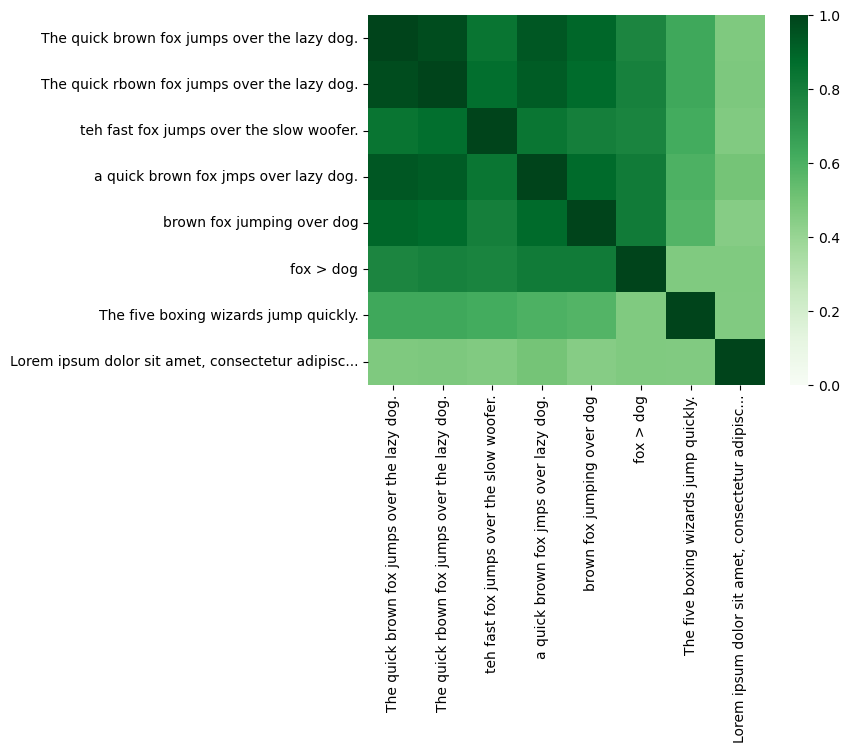

In [18]:
import pandas as pd
import seaborn as sns


# Set up the embeddings in a dataframe.
df = pd.DataFrame([e.values for e in response.embeddings], index=truncated_texts)
# Perform the similarity calculation
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1, cmap="Greens");

In [20]:
# You can see the scores for a particular term directly by looking it up in the dataframe.
sim['The quick brown fox jumps over the lazy dog.'].sort_values(ascending=False)

The quick brown fox jumps over the lazy dog.          0.999999
The quick rbown fox jumps over the lazy dog.          0.975623
a quick brown fox jmps over lazy dog.                 0.939730
brown fox jumping over dog                            0.894507
teh fast fox jumps over the slow woofer.              0.842152
fox > dog                                             0.776455
The five boxing wizards jump quickly.                 0.635346
Lorem ipsum dolor sit amet, consectetur adipisc...    0.472174
Name: The quick brown fox jumps over the lazy dog., dtype: float64

## Further reading

* Explore [search re-ranking using embeddings](https://github.com/google-gemini/cookbook/blob/main/examples/Search_reranking_using_embeddings.ipynb) with the Wikipedia API
* Perform [anomaly detection using embeddings](https://github.com/google-gemini/cookbook/blob/main/examples/Anomaly_detection_with_embeddings.ipynb)

*- [Mark McD](https://linktr.ee/markmcd)*